# Exercise 2A

## 2A.1

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In the next function, we implement the Romberg algorithm. We create an array with size (n,m) which we will fill using the following method.

We first calculate R(0,0) using the formula, $$R(0,0) = \frac{1}{2}  (b-a)  [f(a) + f(b)]$$

We then calculate R(n,0) using the formula,
$$R(n,0) = \frac{1}{2}  R(n-1,0) + h  \sum_{k=1}^{2^{n-1}}f[a + (2k - 1)h]$$
where $n ≥ 1$ and $h = \frac{b-a}{2^n}$.

Finally we calculate R(n,m) using the formula,
$$R(n,m) = R(n,m-1) + \frac{1}{4^m - 1}  [R(n,m-1) - R(n - 1, m - 1)]$$

For $n ≥ 1$ and $m ≥ 1$

All these values are stored in the matrix we created in the beginning.

In [71]:
def rmbrg(a: float, b: float, n: int, m: int, f):
    array = np.zeros((n, m))
    array[0][0] = 0.5 * (b - a) * (f(a) + f(b))

    for i in range(n):
        if i != 0:
            sum = 0
            for k in range((2 ** (i - 1))):
                sum += f(a + ((2 * (k + 1)) - 1) * ((b - a) / (2 ** i)))
            array[i][0] = (0.5 * array[i - 1][0]) + (
                (((b - a) / (2 ** i))) * sum
            )

        for j in range(min(m, i + 1)):
            if i != 0 and j != 0:
                array[i][j] = array[i][j - 1] + (1 / ((4 ** j) - 1)) * (
                    array[i][j - 1] - array[i - 1][j - 1]
                )

    return array

We compute the following integral $\int_{0}^{1} \frac{4}{1 + x^2}dx$ using the Romberg algorithm. As we can see from our computed matrix, there is a minor difference if we compare the elements from the matrix from the book.

In [72]:
f_2a = lambda x: 4 / (1 + (x ** 2))

In [73]:
def main():
    a=0
    b=1
    n=5
    print(rmbrg(a,b,n,n, f_2a))

In [74]:
if __name__ == "__main__":
    main()

[[3.         0.         0.         0.         0.        ]
 [3.1        3.13333333 0.         0.         0.        ]
 [3.13117647 3.14156863 3.14211765 0.         0.        ]
 [3.13898849 3.1415925  3.14159409 3.14158578 0.        ]
 [3.14094161 3.14159265 3.14159266 3.14159264 3.14159267]]


## 2A.2.2

In our experiment we tried to compute the integral $f(x)=\frac{1}{x+1} $ using the Romberg algorithm. We know that the integral of $f(x)$ is $\ln(x+1)$. We'll show the resemblance by plotting the integral and the integraded function. 

In [75]:
f_a2 = lambda x: 1 / (x + 1)
other_F = lambda x: rmbrg(0, x, 20, 20, f_a2)[-1, -1]
F = lambda x: np.log(x + 1)

In [76]:
def prog():
    array = np.linspace(0, 10, 100)
    values_F = np.zeros(100)
    values_OTHER_F = np.zeros(100)

    for i in range(100):
        values_F[i] = F(array[i])
        values_OTHER_F[i] = other_F(array[i])
        #print(i + 1)

    plt.plot(array, values_F)
    plt.plot(array, values_OTHER_F)
    plt.show()

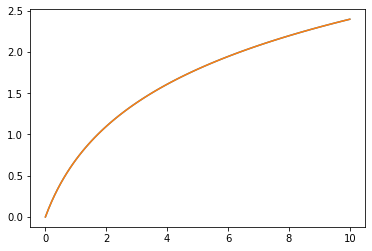

In [77]:
if __name__ == "__main__":
    prog()

Now we'll compare the accuracy of the Romberg algorithm with emperical data given that:
$x = 2$

In [81]:
def comparison():
    x=2
    true_value = np.log(x+1)
    print(f"{true_value=}")
    for i in range(1, 26):
        error = np.abs(true_value - rmbrg(0, x, i, i, f_a2)[-1, -1])
        print(f"{i=}: {error=}")
        
comparison()

true_value=1.0986122886681098
i=1: error=0.23472104466522348
i=2: error=0.012498822443001156
i=3: error=0.0006469705911495982
i=4: error=1.825969788793458e-05
i=5: error=2.290550196182295e-07
i=6: error=1.137817173813005e-09
i=7: error=2.0761170560490427e-12
i=8: error=1.1102230246251565e-15
i=9: error=2.220446049250313e-16
i=10: error=2.220446049250313e-16
i=11: error=1.1102230246251565e-15
i=12: error=2.220446049250313e-16
i=13: error=8.881784197001252e-16
i=14: error=0.0
i=15: error=2.4424906541753444e-15
i=16: error=6.661338147750939e-16
i=17: error=6.661338147750939e-16
i=18: error=6.8833827526759706e-15
i=19: error=6.8833827526759706e-15
i=20: error=2.1316282072803006e-14
i=21: error=4.463096558993129e-14
i=22: error=2.3092638912203256e-14
i=23: error=3.2862601528904634e-14
i=24: error=3.397282455352979e-14
i=25: error=4.884981308350689e-15


As we can see the error decreases as the matrix grows in size. However strangly enough the error increases after the matrix reaches a size of 14x14, which we believe is because of floating point errors.

## 2A.2.3

We need to show why the function $f(x)=\sqrt{x}$ is a "bad" function, to integrate using the Romberg algorithm on [0,1].

In [79]:
def f_a3(x: float) -> float:
    return x ** 0.5

def a2_3():
    a = 0.0
    b = 1.0
    n = 5
    print(rmbrg(a, b, n, n, f_a3))
    
a2_3()

[[0.5        0.         0.         0.         0.        ]
 [0.60355339 0.63807119 0.         0.         0.        ]
 [0.64328305 0.65652626 0.6577566  0.         0.        ]
 [0.65813022 0.66307928 0.66351615 0.66360757 0.        ]
 [0.6635812  0.66539819 0.66555278 0.66558511 0.66559287]]


As we can see the function converges very slowly to the true value ($\frac{2}{3}$). This is because the Romberg algorithm is more accurate, when the function has many continuous derivates. However the derivative of $f(x)$ is not continuous on point $x=0$, that is why we consider this function bad.

## 2A2.6

We need to compute the following $\int_{0}^{\pi} x\cos(3x)dx$ using the Romberg algorithm for a 6x6 matrix.

In [80]:
def f_a6(x: float) -> float:
    return x * np.cos(3 * x)

def a2_6():
    a=0.0
    b=np.pi
    n=6
    print(rmbrg(a, b, n, n, f_a6))
    
a2_6()

[[-4.9348022   0.          0.          0.          0.          0.        ]
 [-2.4674011  -1.64493407  0.          0.          0.          0.        ]
 [-0.36134253  0.340677    0.47305107  0.          0.          0.        ]
 [-0.24981116 -0.21263404 -0.24952144 -0.26099085  0.          0.        ]
 [-0.22876078 -0.22174398 -0.22235131 -0.22192004 -0.22176682  0.        ]
 [-0.22383559 -0.22219387 -0.22222386 -0.22222184 -0.22222302 -0.22222347]]


As we can see the true value of the integrated function is indeed close to $-\frac{2}{9}$.